In [1]:
# imports 
import jax.numpy as jnp
import matplotlib.pyplot as plt
from turbencrypt.make_forcing import FourierTransform, Forcings
from turbencrypt.run_turbulence import Turbulence


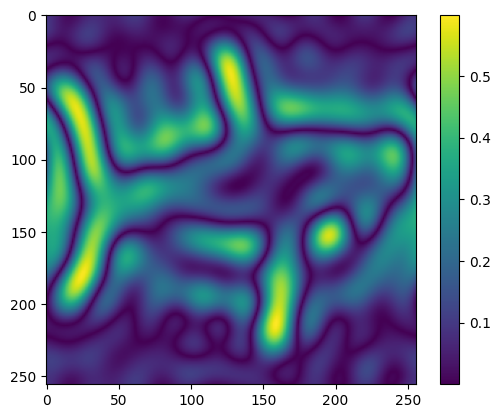

In [2]:
# looking at forcing fns
img_path ="/Users/gilpinlab/turbulence_encryption/raw_images/image_3.jpg" 
model = FourierTransform()
img = model.load_image(img_path)
plt.imshow(img)
plt.colorbar()

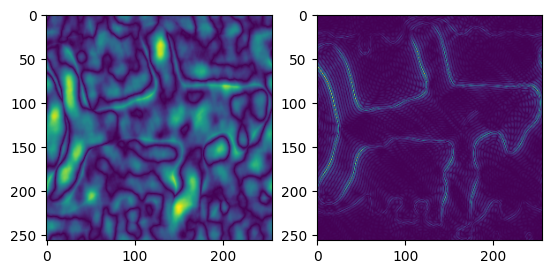

In [3]:
img2 = model.amp_filter(img)
img3 = model.circle_filter(img)
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns
axes[0].imshow(img2)
axes[1].imshow(img3)



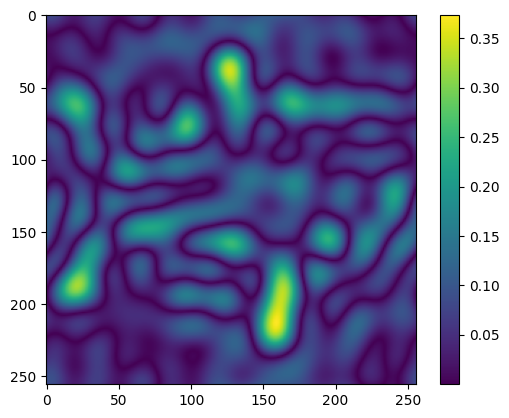

In [4]:
img4 = model.bandpass_filter(img, 2, 8)
plt.imshow(img4)
plt.colorbar()


What we have learned from this is that my previous methods of filtering were garbage and that the bandpass filter is much better and I was almost doing it right with the circle filter but not quite. 
Also messing around with the wave numbers gives very different results
Now we're going to compare the turbulence sims with and without the forcing 

In [3]:
sim_config = {
        'viscosity': 1e-2,
        'max_velocity': 1,
        'final_time': 1,
        'outer_steps': 10,
        'gridsize': 32,
        'max_courant_num': 0.1
    }
offsets = ((0, 0), (0, 0))
forcing_fn = lambda grid: Forcings().mod_kolmogorov_forcing(img, grid, offsets=offsets)

In [4]:
sim = Turbulence()
simulation_at_t, forcing_array_x, forcing_array_y = sim.run_turbulence(forcing_fn, movie=False)

inner_steps=7130.0


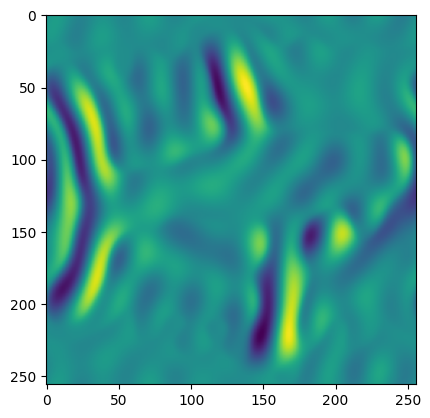

In [5]:
plt.imshow(simulation_at_t)

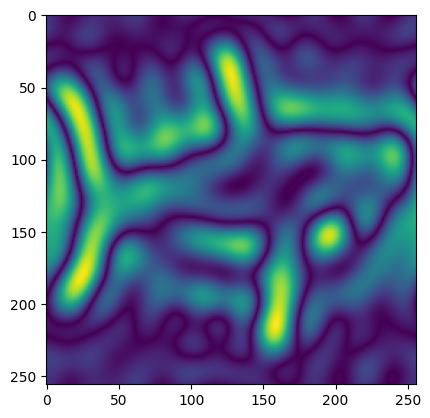

In [11]:
plt.imshow(forcing_array_x)